In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime


ticker = 'HDFCBANK.NS'  
df = yf.download(ticker)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,3.030000,3.030000,2.925000,2.980000,2.331029,350000
1996-01-02,2.980000,3.025000,2.950000,2.975000,2.327118,412000
1996-01-03,2.975000,2.995000,2.950000,2.985000,2.334940,284000
1996-01-04,2.985000,2.980000,2.940000,2.965000,2.319295,282000
1996-01-05,2.965000,2.980000,2.950000,2.960000,2.315385,189000
...,...,...,...,...,...,...
2024-06-18,1596.900024,1610.500000,1589.449951,1607.800049,1607.800049,16207857
2024-06-19,1613.400024,1669.900024,1604.000000,1657.849976,1657.849976,45065598
2024-06-20,1669.800049,1681.449951,1652.000000,1669.349976,1669.349976,20704371


In [11]:
import numpy as np
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape= (x_train.shape[1], 1)))
# model.add(Dropout(0.2)) 
model.add(LSTM(128, return_sequences=False))
model.add(Dense(64))
# model.add(Dropout(0.2)) 
model.add(Dense(32))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=20, epochs=15)

[array([3.15802031e-04, 3.12904699e-04, 3.18699225e-04, 3.07110172e-04,
       3.04212978e-04, 2.83932067e-04, 2.28883998e-04, 2.34678524e-04,
       2.28883998e-04, 2.25986803e-04, 2.05705892e-04, 1.76733261e-04,
       1.27479718e-04, 1.18787997e-04, 6.95344542e-05, 6.37399279e-05,
       5.50480693e-05, 1.73835790e-05, 0.00000000e+00, 0.00000000e+00])]
[2.897263169047092e-05]

[array([3.15802031e-04, 3.12904699e-04, 3.18699225e-04, 3.07110172e-04,
       3.04212978e-04, 2.83932067e-04, 2.28883998e-04, 2.34678524e-04,
       2.28883998e-04, 2.25986803e-04, 2.05705892e-04, 1.76733261e-04,
       1.27479718e-04, 1.18787997e-04, 6.95344542e-05, 6.37399279e-05,
       5.50480693e-05, 1.73835790e-05, 0.00000000e+00, 0.00000000e+00]), array([3.12904699e-04, 3.18699225e-04, 3.07110172e-04, 3.04212978e-04,
       2.83932067e-04, 2.28883998e-04, 2.34678524e-04, 2.28883998e-04,
       2.25986803e-04, 2.05705892e-04, 1.76733261e-04, 1.27479718e-04,
       1.18787997e-04, 6.95344542e-05, 6.37399

In [12]:
from  sklearn.metrics import r2_score
test_data = scaled_data[training_data_len - 20: , :]

x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_test,predictions)
r2

12/12 [==============================] - 3s 52ms/step


0.9256700875338086

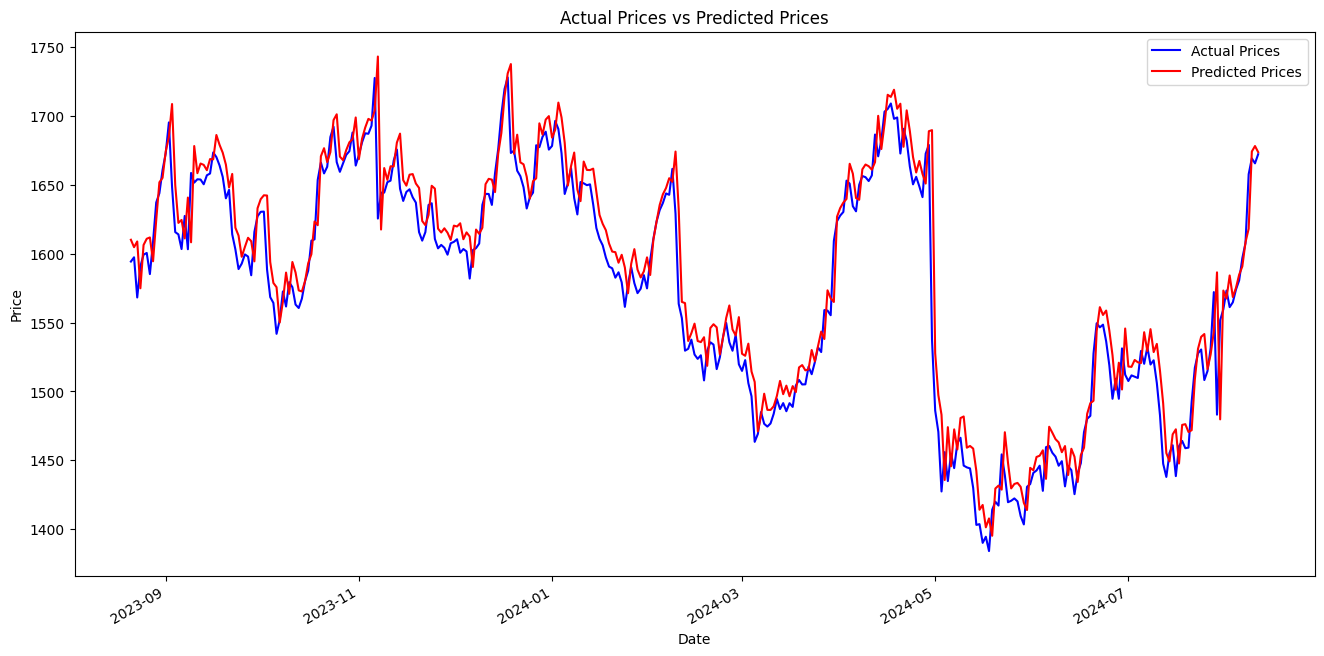

In [13]:
import matplotlib.pyplot as plt
y_test = scaler.inverse_transform(y_test)
predictions = scaler.inverse_transform(predictions)
test_dates = pd.date_range(start='2023-08-21', periods=len(y_test), freq='D')

# Plot the data
plt.figure(figsize=(16, 8))
plt.plot(test_dates, y_test, color='blue', label='Actual Prices')
plt.plot(test_dates, predictions, color='red', label='Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

In [15]:
import joblib


model_file_path = '3.joblib'
scaler_file_path = 'scaler3.joblib'

joblib.dump(model, model_file_path)
joblib.dump(scaler, scaler_file_path)

print(f"Model saved to {model_file_path}")
print(f"Scaler saved to {scaler_file_path}")

Model saved to 3.joblib
Scaler saved to scaler3.joblib
